C:\Users\Cesai\AppData\Local\Temp\ipykernel_1616\2615966190.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


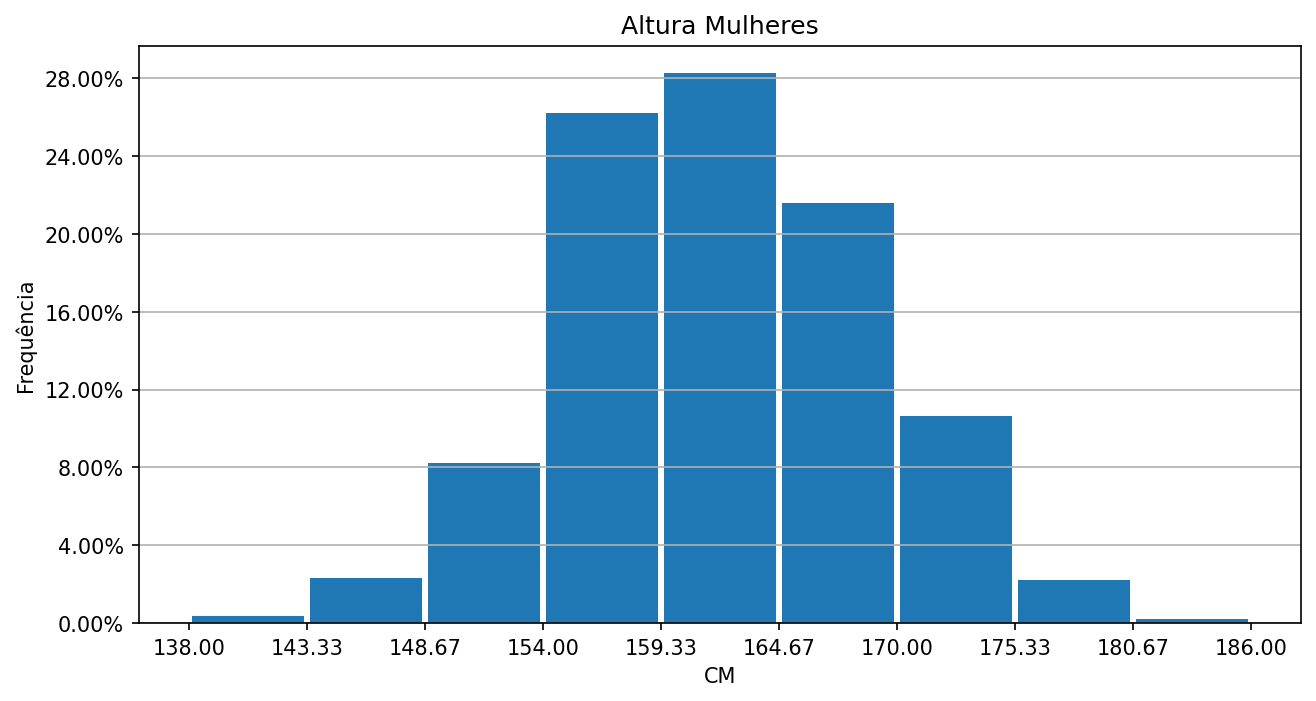

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def calcula_ticks(lista,barras):
    lista.sort()
    menor_valor = lista[0]
    maior_valor = lista[-1]
    intervalo = (maior_valor - menor_valor)/barras
    ticks = [menor_valor]
    ultimo = menor_valor+intervalo
    ticks.append(ultimo)
    for x in range(barras-1):
        ultimo += intervalo
        ticks.append(ultimo)
    return ticks
#-----------------------------------------------------------------
def frequencia_relativa(total,yticks):
    freq_rel = []
    for item in yticks:
        x = item/total
        freq_rel.append("{0:.2f}%".format(x*100))
    return freq_rel
#------------------------------------------------------------------
def gera_histograma(barras,data_series,titulo,unidade):
    lista = data_series.values
    ax = data_series.plot.hist(bins=barras,rwidth=0.95)

    yticks = ax.get_yticks()
    total = len(lista)
    freq_rel = frequencia_relativa(total,yticks)
    ax.set_yticklabels(freq_rel)
    
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    fig.set_dpi(150)

    ticks = calcula_ticks(lista,barras)
    plt.xticks(ticks)
    plt.title(titulo)
    plt.xlabel(unidade)
    plt.ylabel('Frequência')
    plt.grid(axis='y')






data = pd.read_csv('weight-height.csv')

data['Altura CM'] = data['Height']*2.54
data['Altura CM'] = data['Altura CM'].round(0)

altura_mulheres = data.loc[data['Gender']=='Female']['Altura CM']

altura_homens = data.loc[data['Gender']=='Male']['Altura CM']

gera_histograma(9,altura_mulheres,'Altura Mulheres','CM')
plt.show()
